In [ ]:
#VIDEO 22 - CARGANDO EL DATASET DE IRIS
from sklearn.cluster import KMeans #Se utiliza kmeans para poder dividirlo y encontrar grupos.
from sklearn import datasets
import pandas as pd

In [ ]:
#Lo hace visual y llama a iris creando una variable:
import matplotlib.pyplot as plt #Lo hace visualmente.
iris= datasets.load_iris()      #Llama a iris y la crea como variable, carga los datos. 

In [ ]:
#Dividir los datos:
X_iris=iris.data    #Con lo que vamos a entrenar.
Y_iris=iris.target  #La etiqueta que le asignamos.

In [ ]:
#Crear nuestro DataFrame para poder dividir la info:
x=pd.DataFrame(iris.data, columns= ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']) #Agregamos iris que tiene todos los elementos, le decimos las columnas con las cuales entrenar. 
y=pd.DataFrame(iris.target, columns= ['Target']) #Es la info que vamos a generar
x.head(5) #Muestra los primeros 5 elementos 

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0, 0.5, 'Petal Width')

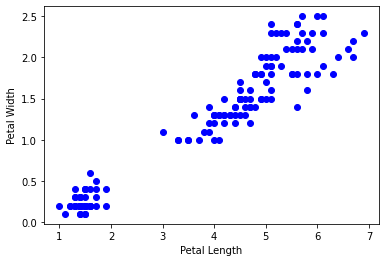

In [ ]:
#Plotearlo, hacerlo gráficamente: 
plt.scatter(x['Petal Length'], x['Petal Width'], c='blue')
plt.xlabel('Petal Length', fontsize=10) #Crea las 2 etiquetas y le asigna tamaño. 
plt.ylabel('Petal Width', fontsize=10)
#A continuación se pueden ver dos grandes grupos, pero tal vez incluyan más grupos dentro, de ahí la importancia de KMEANS para poder dividirlos. 


In [ ]:
#VIDEO 23 - CONSTRUCCIÓN Y EVALUACIÓN DEL MODELO CON K-MEANS:

#Creamos el modelo:
model= KMeans(n_clusters=3,max_iter=1000) #Define el modelo con el algoritmo KMeans con dos parámetros: 1) n_clusters p/ estar seguros que son dos grupos y 2)Iteración que significa como moveremos K 
model.fit(x)                              #Lo entrena, x son los puntos.
y_labels= model.labels_                   #Mandamos a obtener los labels, son todas las etiquetas que encontró.

In [ ]:
#Hacer la predicción de y, a ver cómo lo dividió:
#Devuelve un arreglo de 0 y 1, son los dos grupos encontrados relacionados al gráfico anterior. 
y_kmeans=model.predict(x)       #y_kmeans es la etiqueta que la obtenemos a través de predict p/ que muestre el arreglo (0-1) Cuando cambié el nclusters se dividio en 3 
print('Predicciones', y_kmeans) #Le decimos que imprima las predicciones y cómo dividió la info. El valor a imprimir es y_kmeans

Predicciones [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [ ]:
#Para saber si hizo bien la división, si esos grupos son los adecuados:
#Teniendo el nclusters en 2 el porcentaje es de 53, cambiandolo a 3 es de 73
from sklearn import metrics   #Obtenemos un método, importamos metrics que ayuda a generar el accuracy
accuracy=metrics.adjusted_rand_score(Y_iris, y_kmeans) #El método randscore necesita 2 valores: yiris es la info que tenemos de entrada y ykmeans es la predicción
print (accuracy)

0.7302382722834697


Text(0, 0.5, 'Petal Width')

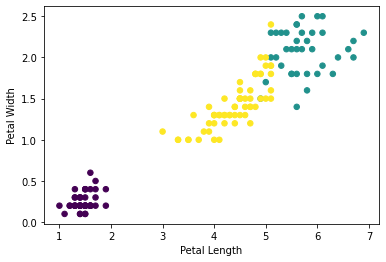

In [ ]:
#VIDEO 24 - GRAFICACIÓN DEL MODELO

#Obtener atributos visuales:
plt.scatter(x['Petal Length'], x['Petal Width'], c=y_kmeans, s=30)
plt.xlabel('Petal Length', fontsize=10)
plt.ylabel('Petal Width', fontsize=10)